In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from prettytable import PrettyTable

# Cargar datos desde el archivo Excel
df = pd.read_excel(r"C:\Users\Andy\Desktop\Data3.xlsx", header=0)

In [2]:
print(df)

      Wavelength [nm]  Sample  Valor Espectral  Clasificacion
0          899.345263       1         0.704542              1
1          905.470353       1         0.707624              1
2          910.594255       1         0.708650              1
3          916.385616       1         0.705107              1
4          922.010113       1         0.702408              1
...               ...     ...              ...            ...
1395      1855.676502       8         0.670076              0
1396      1861.300998       8         0.665279              0
1397      1866.925494       8         0.662449              0
1398      1872.549991       8         0.651578              0
1399      1878.174487       8         0.650045              0

[1400 rows x 4 columns]


In [3]:
print(df.head())

   Wavelength [nm]  Sample  Valor Espectral  Clasificacion
0       899.345263       1         0.704542              1
1       905.470353       1         0.707624              1
2       910.594255       1         0.708650              1
3       916.385616       1         0.705107              1
4       922.010113       1         0.702408              1


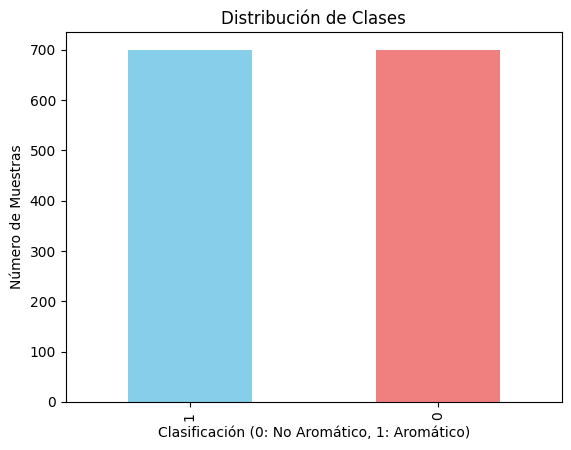

In [4]:
# Visualizar la distribución de las clases
class_distribution = df['Clasificacion'].value_counts()
class_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribución de Clases')
plt.xlabel('Clasificación (0: No Aromático, 1: Aromático)')
plt.ylabel('Número de Muestras')
plt.show()

In [5]:
# Organizar los datos por Sample y Wavelength
df_pivoted = df.pivot(index='Wavelength [nm]', columns='Sample', values='Valor Espectral')

Text(0.5, 1.0, 'Valores Espectrales antes del Preprocesamiento')

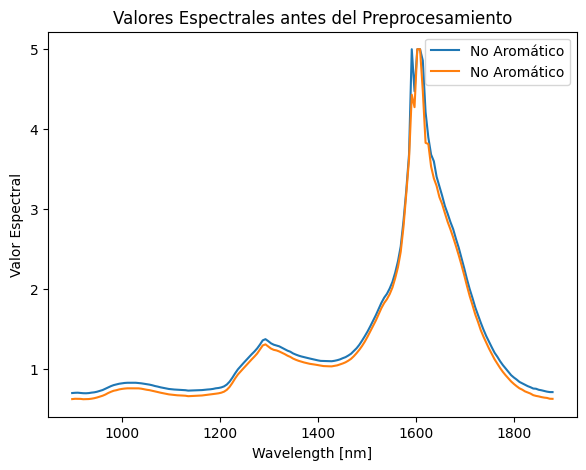

In [6]:
# Visualización de valores espectrales antes del preprocesamiento
n_grupos = 2
muestras_por_grupo = 4
grupo_etiquetas = {1: 'No Aromático', 2: 'No Aromático', 3: 'No Aromático', 4: 'No Aromático',
                   5: 'Aromático', 6: 'Aromático', 7: 'Aromático', 8: 'Aromático'}

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
for grupo in range(1, n_grupos + 1):
    etiqueta = grupo_etiquetas[grupo]
    plt.plot(df_pivoted.index, df_pivoted[grupo], label=etiqueta)

plt.xlabel('Wavelength [nm]')
plt.ylabel('Valor Espectral')
plt.legend()
plt.title('Valores Espectrales antes del Preprocesamiento')

In [7]:
# Extraer características espectrales y etiquetas
X = df.iloc[:, 2:-1].values  # Características espectrales
y = df['Clasificacion'].values  # Etiquetas

In [8]:
# Escalar las características para tener media cero y desviación estándar uno
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pequeño preprocesamiento
scaler = StandardScaler()
df_pivoted_scaled = scaler.fit_transform(df_pivoted)
df_pivoted_scaled = pd.DataFrame(df_pivoted_scaled, columns=df_pivoted.columns)

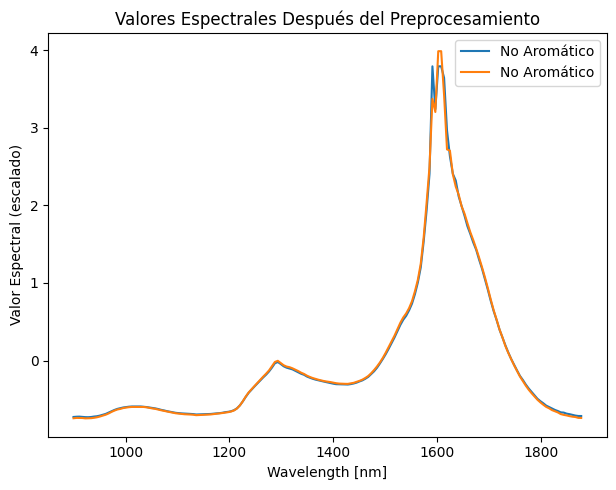

In [9]:
# Visualización después del preprocesamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
for grupo in range(1, n_grupos + 1):
    etiqueta = grupo_etiquetas[grupo]
    plt.plot(df_pivoted.index, df_pivoted_scaled[grupo], label=etiqueta)

plt.xlabel('Wavelength [nm]')
plt.ylabel('Valor Espectral (escalado)')
plt.legend()
plt.title('Valores Espectrales Después del Preprocesamiento')

plt.tight_layout()
plt.show()

In [10]:
# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Inicializar modelos de clasificación
knn_model = KNeighborsClassifier(n_neighbors=3)
nb_model = GaussianNB()

In [12]:
# Entrenar modelos
knn_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

GaussianNB()

In [13]:
# Realizar predicciones
knn_predictions = knn_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)

In [14]:
# Evaluar rendimiento
knn_accuracy = metrics.accuracy_score(y_test, knn_predictions)
nb_accuracy = metrics.accuracy_score(y_test, nb_predictions)

print(f'Precision del modelo KNN: {knn_accuracy}')
print(f'Precision del Naive Bayes: {nb_accuracy}')

Precision del modelo KNN: 0.48928571428571427
Precision del Naive Bayes: 0.5714285714285714


In [15]:
from sklearn.metrics import confusion_matrix, classification_report

print("Métricas para KNN:")
print(confusion_matrix(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))

Métricas para KNN:
[[75 65]
 [78 62]]
              precision    recall  f1-score   support

           0       0.49      0.54      0.51       140
           1       0.49      0.44      0.46       140

    accuracy                           0.49       280
   macro avg       0.49      0.49      0.49       280
weighted avg       0.49      0.49      0.49       280



In [16]:
print("Métricas para Naive Bayes:")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

Métricas para Naive Bayes:
[[65 75]
 [45 95]]
              precision    recall  f1-score   support

           0       0.59      0.46      0.52       140
           1       0.56      0.68      0.61       140

    accuracy                           0.57       280
   macro avg       0.57      0.57      0.57       280
weighted avg       0.57      0.57      0.57       280



In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Métricas para KNN
print("Métricas para KNN:")
print("Accuracy:", knn_accuracy)
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, knn_predictions))
print("\nInforme de Clasificación:")
print(classification_report(y_test, knn_predictions))

Métricas para KNN:
Accuracy: 0.48928571428571427

Matriz de Confusión:
[[75 65]
 [78 62]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.49      0.54      0.51       140
           1       0.49      0.44      0.46       140

    accuracy                           0.49       280
   macro avg       0.49      0.49      0.49       280
weighted avg       0.49      0.49      0.49       280



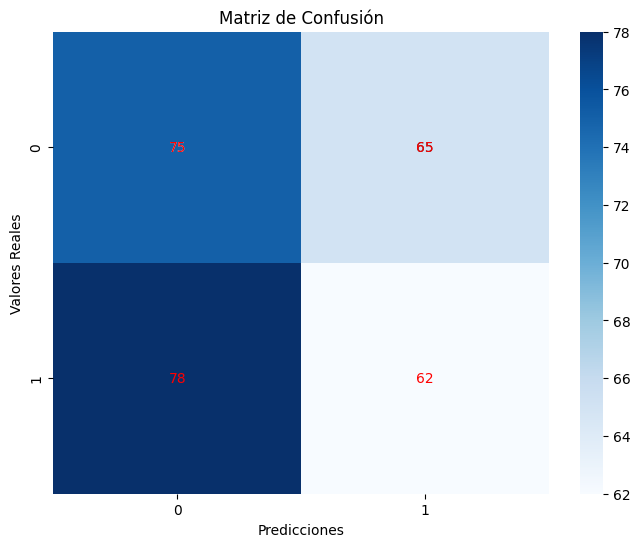

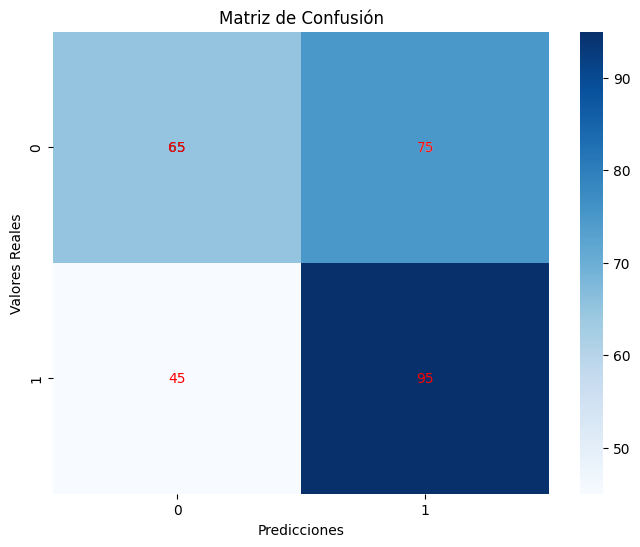

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Función para visualizar la matriz de confusión como un mapa de calor
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))

    # Mapa de calor
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=True)

    # Añadir texto con los valores de la matriz
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j + 0.5, i + 0.5, str(cm[i, j]), ha='center', va='center', color='red')

    plt.title("Matriz de Confusión")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Reales")
    plt.show()

# Visualizar la matriz de confusión para KNN
plot_confusion_matrix(y_test, knn_predictions, labels=[0, 1])

# Visualizar la matriz de confusión para Naive Bayes
plot_confusion_matrix(y_test, nb_predictions, labels=[0, 1])

In [19]:
# Calcular métricas para KNN y Naive Bayes
precision_knn = precision_score(y_test, knn_predictions)
recall_knn = recall_score(y_test, knn_predictions)
f1_knn = f1_score(y_test, knn_predictions)

precision_nb = precision_score(y_test, nb_predictions)
recall_nb = recall_score(y_test, nb_predictions)
f1_nb = f1_score(y_test, nb_predictions)


In [20]:
# Nombres de las métricas
metric_names = ['Precision', 'Recall', 'F1 Score']


In [21]:
# Valores de las métricas para KNN y Naive Bayes
knn_metrics = [precision_knn, recall_knn, f1_knn]
nb_metrics = [precision_nb, recall_nb, f1_nb]


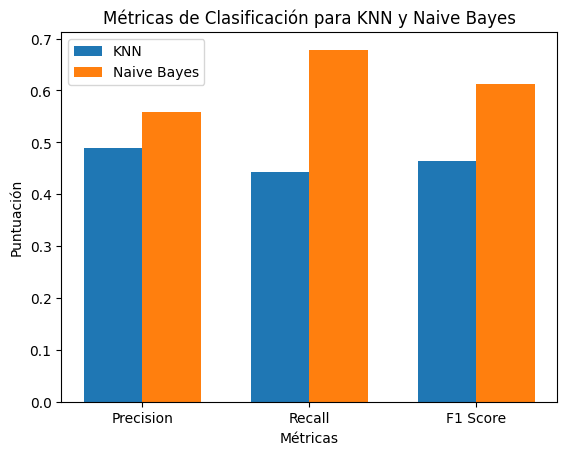

In [22]:
#Gráfico de barras para las métricas
bar_width = 0.35
index = range(len(metric_names))

fig, ax = plt.subplots()
bar1 = ax.bar(index, knn_metrics, bar_width, label='KNN')
bar2 = ax.bar([i + bar_width for i in index], nb_metrics, bar_width, label='Naive Bayes')

# Configurar el gráfico
ax.set_xlabel('Métricas')
ax.set_ylabel('Puntuación')
ax.set_title('Métricas de Clasificación para KNN y Naive Bayes')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(metric_names)
ax.legend()

# Mostrar el gráfico
plt.show()

In [23]:
!pip install prettytable

In [24]:
pip install --upgrade threadpoolctl scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [27]:
from prettytable import PrettyTable

# Calcular métricas para KNN y Naive Bayes
precision_knn = precision_score(y_test, knn_predictions)
recall_knn = recall_score(y_test, knn_predictions)
f1_knn = f1_score(y_test, knn_predictions)

precision_knn_p = round(precision_knn *100, 1)
recall_knn_p = round(recall_knn *100, 1)
f1_knn_p = round(f1_knn *100, 1)

precision_nb = precision_score(y_test, nb_predictions)
recall_nb = recall_score(y_test, nb_predictions)
f1_nb = f1_score(y_test, nb_predictions)

precision_nb_p = round(precision_nb *100, 1)
recall_nb_p = round(recall_nb *100, 1)
f1_nb_p = round(f1_nb *100, 1)

table = PrettyTable()
# Crear una tabla para las métricas
table.field_names = ['Métrica', 'KNN', 'Naive Bayes']
table.add_row(['Precision', f'{precision_knn} - {precision_knn_p}%', f'{precision_nb} - {precision_nb_p}%'])
table.add_row(['Recall', f'{recall_knn} - {recall_knn_p}%' ,f'{recall_nb} - {recall_nb_p} %'])
table.add_row(['F1 Score',f'{f1_knn} - {f1_knn_p}%' , f'{f1_nb} - {f1_nb_p}%'])

In [28]:
# Imprimir la tabla
print("Métricas de Clasificación para KNN y Naive Bayes:")
print(table)

Métricas de Clasificación para KNN y Naive Bayes:
+-----------+-----------------------------+-----------------------------+
|  Métrica  |             KNN             |         Naive Bayes         |
+-----------+-----------------------------+-----------------------------+
| Precision |  0.4881889763779528 - 48.8% |  0.5588235294117647 - 55.9% |
|   Recall  | 0.44285714285714284 - 44.3% | 0.6785714285714286 - 67.9 % |
|  F1 Score | 0.46441947565543074 - 46.4% |  0.6129032258064516 - 61.3% |
+-----------+-----------------------------+-----------------------------+


In [29]:
# Lista de vecinos para KNN
neighbors_list = list(range(1, 11))  # Puedes ajustar el rango según sea necesario

# Lista para almacenar las precisiones de KNN
knn_precisions = []

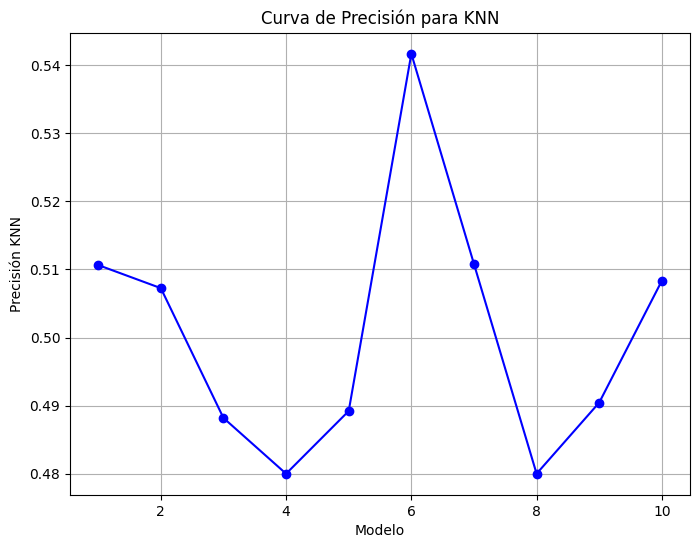

In [30]:
# Entrenar y evaluar KNN para diferentes valores de vecinos
for neighbors in neighbors_list:
    knn_model = KNeighborsClassifier(n_neighbors=neighbors)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    precision_knn = precision_score(y_test, knn_predictions)
    knn_precisions.append(precision_knn)

# Gráfico para la precisión de KNN en función de los vecinos
plt.figure(figsize=(8, 6))
plt.plot(neighbors_list, knn_precisions, marker='o', linestyle='-', color='blue')
plt.xlabel('Modelo')
plt.ylabel('Precisión KNN')
plt.title('Curva de Precisión para KNN')
plt.grid(True)
plt.show()

In [31]:
# Lista para almacenar las precisiones de Naive Bayes
nb_precisions = []

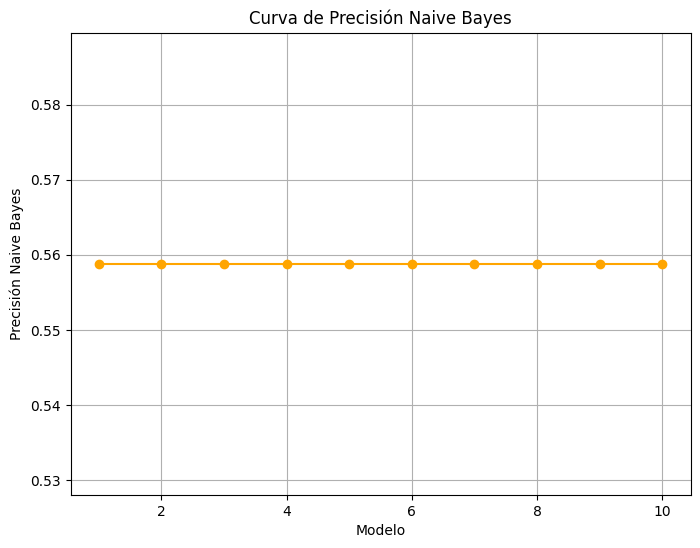

In [32]:
# Entrenar y evaluar Naive Bayes para diferentes valores de vecinos
for neighbors in neighbors_list:
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    nb_predictions = nb_model.predict(X_test)
    precision_nb = precision_score(y_test, nb_predictions)
    nb_precisions.append(precision_nb)

# Gráfico para la precisión de Naive Bayes en función de los vecinos
plt.figure(figsize=(8, 6))
plt.plot(neighbors_list, nb_precisions, marker='o', linestyle='-', color='orange')
plt.xlabel('Modelo')
plt.ylabel('Precisión Naive Bayes')
plt.title('Curva de Precisión Naive Bayes')
plt.grid(True)
plt.show()

In [33]:
# Lista de vecinos para KNN
neighbors_list = list(range(1, 11))  # Puedes ajustar el rango según sea necesario


In [34]:
# Listas para almacenar las precisiones de KNN y Naive Bayes
knn_precisions = []
nb_precisions = []

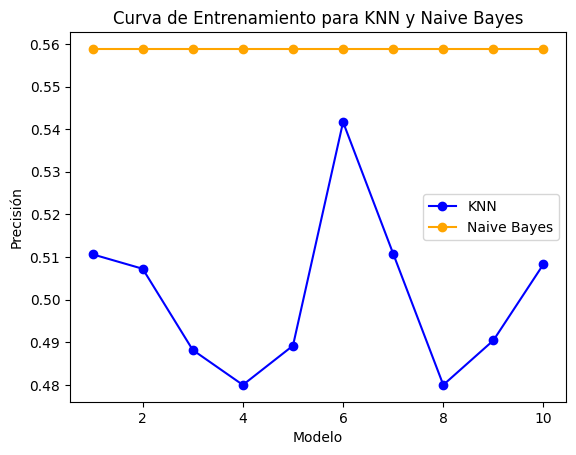

In [35]:
#Curva de Entrenamiento
for neighbors in neighbors_list:
    knn_model = KNeighborsClassifier(n_neighbors=neighbors)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    precision_knn = precision_score(y_test, knn_predictions)
    knn_precisions.append(precision_knn)

    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    nb_predictions = nb_model.predict(X_test)
    precision_nb = precision_score(y_test, nb_predictions)
    nb_precisions.append(precision_nb)

# Crear un gráfico de líneas para la precisión de KNN y Naive Bayes en función de los vecinos
plt.plot(neighbors_list, knn_precisions, marker='o', linestyle='-', color='blue', label='KNN')
plt.plot(neighbors_list, nb_precisions, marker='o', linestyle='-', color='orange', label='Naive Bayes')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.title('Curva de Entrenamiento para KNN y Naive Bayes')
plt.legend()
plt.show()